In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
rfm = pd.read_csv('./rfm.csv')

In [3]:
rfm.head()

,visitor_id,lastpurchasetime,recency,frequency,transaction_amt
0,1,2019-02-09 13:07:42.611,18,91,292110.277656
1,2,2019-02-11 23:37:59.533,16,103,262238.426654
2,3,2019-02-09 19:49:39.239,18,91,108361.800668
3,4,2019-02-11 18:45:20.279,16,81,139132.195708
4,5,2019-02-11 14:07:52.022,16,91,139624.498537


In [4]:
rfm.describe()

,visitor_id,recency,frequency,transaction_amt
count,29999.000000,29999.000000,29999.000000,29999.000000
mean,15000.000000,16.912997,91.873096,229949.560230
std,8660.109699,1.790878,9.554434,68551.617485
min,1.000000,15.000000,56.000000,43820.213256
25%,7500.500000,16.000000,85.000000,181321.574005
50%,15000.000000,17.000000,92.000000,224478.075772
75%,22499.500000,18.000000,98.000000,272968.888982
max,29999.000000,32.000000,131.000000,569539.286393


In [5]:
# get recency percentiles :

percentiles = [np.percentile(rfm.recency, i) for i in [85, 65, 40, 20]]
R_85, R_65, R_40, R_20 = percentiles[0], percentiles[1], percentiles[2], percentiles[3]

# get frequency percentiles : 
percentiles = [np.percentile(rfm.frequency, i) for i in [85, 65, 40, 20]]
F_85, F_65, F_40, F_20 = percentiles[0], percentiles[1], percentiles[2], percentiles[3]

# get monetary percentile : 
percentiles = [np.percentile(rfm.transaction_amt, i) for i in [85, 65, 40, 20]]
M_85, M_65, M_40, M_20 = percentiles[0], percentiles[1], percentiles[2], percentiles[3]

(M_85, M_65, M_40, M_20)

(300776.7959688206, 251414.07663127856, 207522.33072516043, 171562.4388057412)

In [6]:
def RScore(val) :
    if val > R_85: return 5
    elif val > R_65: return 4
    elif val > R_40: return 3
    elif val > R_20: return 2
    else : return 1
    
def FScore(val) :
    if val > F_85: return 5
    elif val > F_65: return 4
    elif val > F_40: return 3
    elif val > F_20: return 2
    else : return 1

def MScore(val) :
    if val > M_85: return 5
    elif val > M_65: return 4
    elif val > M_40: return 3
    elif val > M_20: return 2
    else : return 1

In [7]:
rfm['recency'] = rfm.recency.apply(RScore)
rfm['frequency'] = rfm.frequency.apply(FScore)
rfm['monetary'] = rfm.transaction_amt.apply(MScore)
rfm.drop('transaction_amt', axis=1, inplace=True)


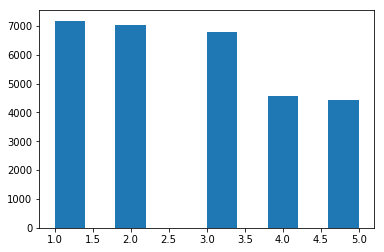

In [10]:
plt.hist(rfm.recency);

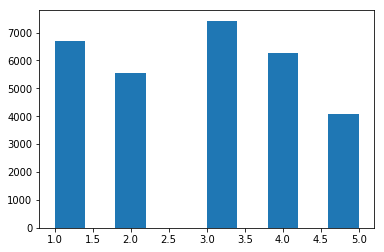

In [11]:
plt.hist(rfm.frequency);

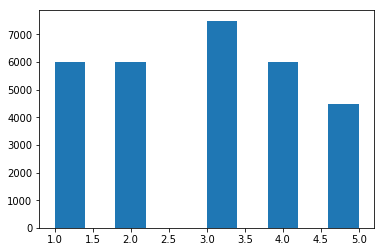

In [12]:
plt.hist(rfm.monetary);

Text(0, 0.5, 'Counts')

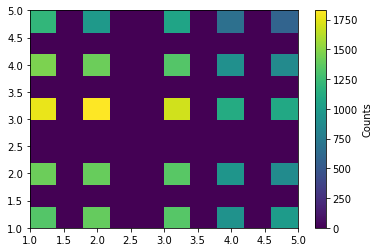

In [11]:
plt.hist2d(rfm.recency, rfm.monetary)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Counts')

Text(0, 0.5, 'Counts')

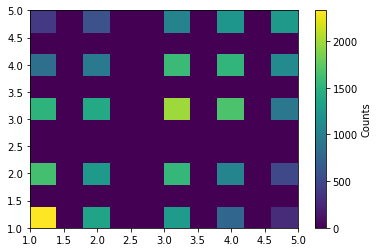

In [13]:
plt.hist2d(rfm.frequency, rfm.monetary)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Counts')

Extract visitors that belong to a particular segment

In [14]:
champions          = rfm[(rfm.recency >=4) & (rfm.frequency >= 4) & (rfm.monetary >= 4)].visitor_id.values
loyal_customers    = rfm[(rfm.recency >= 2) & (rfm.frequency >= 3) & (rfm.monetary >= 3)].visitor_id.values
potential_loyalist = rfm[(rfm.recency >= 3) & (rfm.frequency <= 3) & (rfm.monetary <= 3)].visitor_id.values
new_customers      = rfm[(rfm.recency >= 4) & (rfm.frequency <= 1) & (rfm.monetary <=1)].visitor_id.values
promising          = rfm[((rfm.recency >= 4) | (rfm.recency == 3)) & (rfm.frequency <= 1) & (rfm.monetary <=1)].visitor_id.values
need_attention     = rfm[((rfm.recency == 2) | (rfm.recency == 3)) & ((rfm.frequency == 2) | (rfm.frequency == 3)) & ((rfm.monetary == 2) | (rfm.monetary == 3))].visitor_id.values
about_to_sleep     = rfm[((rfm.recency == 2) | (rfm.recency == 3)) & (rfm.frequency <= 2) & (rfm.monetary <=2)].visitor_id.values
at_risk            = rfm[(rfm.recency <= 2) & ((rfm.frequency <= 5) | (rfm.frequency >= 2)) & ((rfm.monetary <=5) | (rfm.monetary >= 2))].visitor_id.values
cant_lose_them     = rfm[(rfm.recency <= 1) & ((rfm.frequency == 4) | (rfm.frequency == 5)) & ((rfm.monetary == 4) | (rfm.monetary == 5))].visitor_id.values
hibernating        = rfm[((rfm.recency == 1) | (rfm.recency == 2)) & ((rfm.frequency == 1) | (rfm.frequency == 2)) & ((rfm.monetary == 1) | (rfm.monetary == 2))].visitor_id.values
lost               = rfm[(rfm.recency <= 2) & (rfm.frequency <= 2) & (rfm.monetary <=2)].visitor_id.values

In [15]:
customer_segments = ['Champions', 'Loyal', 'Potentially Loyal', 'New', 'Promising', 'Needs Attention', 'About To Sleep', 'At Risk', 'Cant Lose', 'Hibernating', 'Lost']
notification_types = ['Holiday Promotions',
                      'Sale Promotions',
                      'New Product Offerings', 
                      'Company Announcements', 
                      'Welcome Email Series', 
                      'Cart Recovery Prompts',
                      'Newsletters', 
                      'Customer Testimonials',
                      'First-order-only coupons',
                      'Order Confirmation',
                      'Re-Ordering Forms',
                      'Product Advice',
                      'Product Recommendation', 
                      'Educational Content',
                      'Customer Satisfaction Surveys',
                      'Product Review Request',
                      'Early Access To New Product',
                      'Dedicated Referral Prompts',
                      'Educational Content', 
                      'Exclusive Coupons',
                      'Win-back Surveys', 
                      'Time-sensitive Coupons',
                      'We miss you emails',
                      'Big Product Update',
                      'Customer service Update',
                      'Major Announcement',
                      'Big Product Discounts',
                      'How-can we help? questionaires',
                      'last-ditch emails',
                      'Membership',
                      'Personalized Email',
                      'Reach Out Campaigns']


# champions       3 times a week + rewarding notification
# loyal customers 3 times a week + engaging notification
# potential       2 times + offer + loyalty programs
# new customers   2 times + product related recommendation
# promising       2 times + offer + free trials
# need_attention  1 times + (delaying the notification type of the customer does not responding)+ limited time offers
# about to sleep   1 times + recommended popular products + renewal at discount
# at_risk         1 times + renewal product 
# can't loose     1 times + 
# hibernating     1 times
# lost            1 times

In [17]:
df = pd.DataFrame(np.zeros((len(customer_segments), len(notification_types))), columns=notification_types, index=customer_segments)

In [18]:
p_champions = ['Holiday Promotions',
               'Sale Promotions',
               'New Product Offerings',
               'Company Announcements', 
               'Order Confirmations',
               'Big Product Update',
               'Early Access To New Products',
               'Exclusive Coupons',
               'Dedicated Referral Prompts',
               'Major Announcement'
              ]

p_loyal = ['Holiday Promotions',
           'New Product Offerings', 
           'Sale Promotions',
           'Product Review Request', 
           'Product Advice',
           'Educational Content', 
           'Big Product Update', 
           'Customer Service Update',
           'Dedicated Referral Prompts',
           'Major Announcement'
          ]

p_potential = ['Membership', 
               'Customer Testimonials',
               'Product Recommendation',
               'Company Announcements', 
               'Educational Content'
               'Order Confirmation',

              ]

p_new = ['Welcome Email Series',
         'Newsletters',
         'Educational Content', 
         'How can we help questionaires',
         'Membership',
         'Cart Recovery Prompts',
         'Sale Promotions',
         'Order Confirmation',

        ]

p_promising = ['Newsletters', 
               'Customer Testimonials',
               'First-order-only coupons',
               'Time-sensitive Coupons',
               'Big Product Update',
               'How-can we help? questionaires',
               'Sale Promotions',
               'Order Confirmation'
               ]

p_need_attention = ['Time-sensitive Coupons',
                    'How-can we help? questionaires',
                    'Product Advice',
                    'Product Recommendation', 
                    'Educational Content',
                    'Exclusive Coupons',
                    'Win-back Surveys', 
                    'We miss you emails',
                    'Big Product Update',
                    'Big Product Discounts'
                    'Customer service Update',
                    'Big Product Discounts'
]

p_about_to_sleep = ['last-ditch emails',  
                    'Exclusive Coupons',
                    'Win-back Surveys', 
                    'Big Product Discounts'
                   ]

p_at_risk = ['last-ditch emails',
             'Personalized email',
             'Big Product Discounts'
             'How-can we help? questionaires'
            ]

p_cant_lose = ['Exclusive Coupons',
               'Win-back Surveys', 
               'Personalized email',
               'Big Product Discounts'
               'We miss you emails',
              ]

p_hibernating = [ 'We miss you emails',
                  'Newsletters', 
                  'Customer Testimonials',
                  'Big Product Update',
                  'Big Product Discounts',
                  'Educational Content',
                  'Exclusive Coupons'
                ]
p_lost = ['Personalized Email',
          'Reach Out Campaigns']

In [20]:
for i in p_champions :
    df.loc['Champions'][i] = 1    

In [21]:
for i in p_loyal :
    df.loc['Loyal'][i] = 1

In [48]:
for i in p_potential :
    df.loc['Potentially Loyal'][i] = 1

In [23]:
for i in p_new :
    df.loc['New'][i] = 1

In [24]:
for i in p_promising :
    df.loc['Promising'][i] = 1

In [25]:
for i in p_need_attention:
    df.loc['Needs Attention'][i] = 1

In [26]:
for i in p_about_to_sleep:
    df.loc['About To Sleep'][i] = 1

In [27]:
for i in p_at_risk:
    df.loc['At Risk'][i] = 1

In [28]:
for i in p_cant_lose:
    df.loc['Cant Lose'][i] = 1

In [29]:
for i in p_hibernating:
    df.loc['Hibernating'][i] = 1

In [30]:
for i in p_lost :
    df.loc['Lost'][i] = 1

In [ ]:
df.to_csv('Segment_Mapping.csv')

Dataframe showing number recommended number notification to send to each customer segment

In [50]:
df = pd.DataFrame(index=customer_segments)

In [51]:
df['Recommended_frequency'] = [3, 3, 2, 2, 2, 1,1,1,1,1,1]

In [52]:
df.to_csv('Recommended_Frequency.csv')

In [11]:
import pandas as pd
user_categorisation = pd.read_csv("/Users/gautamchauhan21/smart_notifications/Segment_Mapping.csv",index_col=0)
recommended_requency = pd.read_csv("/Users/gautamchauhan21/smart_notifications/Recommended_Frequency.csv",index_col=0)

In [12]:
user_categorisation.head()

,Holiday Promotions,Sale Promotions,New Product Offerings,Company Announcements,Welcome Email Series,Cart Recovery Prompts,Newsletters,Customer Testimonials,First-order-only coupons,Order Confirmation,...,We miss you emails,Big Product Update,Customer service Update,Major Announcement,Big Product Discounts,How-can we help? questionaires,last-ditch emails,Membership,Personalized Email,Reach Out Campaigns
Champions,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Loyal,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Potentially Loyal,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
New,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Promising,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [13]:
user_categorisation.columns

Index(['Holiday Promotions', 'Sale Promotions', 'New Product Offerings',
       'Company Announcements', 'Welcome Email Series',
       'Cart Recovery Prompts', 'Newsletters', 'Customer Testimonials',
       'First-order-only coupons', 'Order Confirmation', 'Re-Ordering Forms',
       'Product Advice', 'Product Recommendation', 'Educational Content',
       'Customer Satisfaction Surveys', 'Product Review Request',
       'Early Access To New Product', 'Dedicated Referral Prompts',
       'Educational Content.1', 'Exclusive Coupons', 'Win-back Surveys',
       'Time-sensitive Coupons', 'We miss you emails', 'Big Product Update',
       'Customer service Update', 'Major Announcement',
       'Big Product Discounts', 'How-can we help? questionaires',
       'last-ditch emails', 'Membership', 'Personalized Email',
       'Reach Out Campaigns'],
      dtype='object')

In [3]:
cat = pd.read_csv("/Users/gautamchauhan21/dataframes/category.csv")
cat1 = pd.read_csv("/Users/gautamchauhan21/dataframes/category1_corelationMatrix.csv",index_col=0)
cat2 = pd.read_csv("/Users/gautamchauhan21/dataframes/category2_corelationMatrix.csv",index_col=0)
cat3 = pd.read_csv("/Users/gautamchauhan21/dataframes/category3_corelationMatrix.csv",index_col=0)

In [5]:
import turicreate

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [ ]:
cat1